In [1]:
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm

from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import RandomForestClassifier


Text(0, 0.5, 'y')

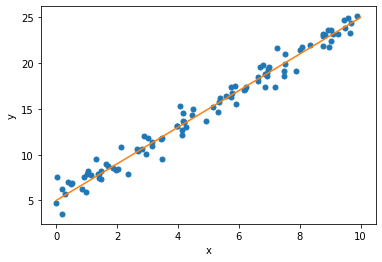

In [2]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n)

plt.figure()
plt.plot(x, y, 'o', ms = 5)

xx = np.array([0, 10])
plt.plot(xx, beta_0 + beta_1 * xx )
plt.xlabel('x')
plt.ylabel('y')

In [3]:

# def compute_rss(y_estimate, y):
#   return sum(np.power(y-y_estimate, 2))

# def estimate_y(x, b_0, b_1):
#   return b_0 + b_1 * x

# rss = compute_rss(estimate_y(x, beta_0, beta_1), y) 
# rss

We have seen in the above graph dummy data with intercept in 5 and slope 2. Which resembles to a linear equation of a line: 
$$y = b_0 + m\cdot x,$$
and with the given values it would look like the following: 
$$y = 5 + 2\cdot x$$

#### The RSS (Residual Sum of Squares)
Let's first create a set of different slopes which can be inserted in the above equation instead of `2`. What is the plan? 

With each slope we will have an array of `100` results that will be differentiated with `y` and then those differences will be squared. After that, we will sum those squared values which gives a number next appended in the `rss` list.

In short, with each slope we will have a corresponding _sum value_ in our `rss` list. The next step is just to find the lowest value in the given list. Which will be accomplished with `np.argmin(rss)`. Since the index in the `rss` list is the same as the `slopes` list, we can find the slope corresponding to the lowest rss value.

In [4]:
rss = []

slopes = np.arange(-10,15,0.001)
for slope in slopes:
    rss.append(np.sum((y - beta_0 -slope*x)**2))

ind_min = np.argmin(rss)

print(slopes[ind_min])

2.003999999993347


Text(0, 0.5, '$RSS$')

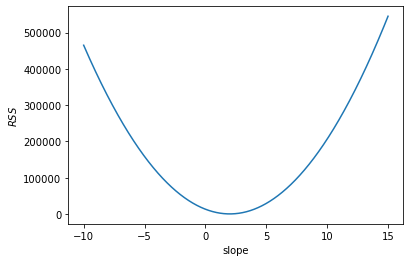

In [5]:
plt.figure()
plt.plot(slopes,rss)
plt.xlabel('slope')
plt.ylabel('$RSS$')

## Simple linear Regression in code

In [6]:
mod = sm.OLS(y, x)
est = mod.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                    1.14e-75
Time:                        08:05:21   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [7]:
X = sm.add_constant(x)
mod = sm.OLS(y, X)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           7.47e-82
Time:                        08:05:21   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

## ScikitLearn for Linear regression

In [8]:
n = 500
beta_0 = 5
beta_1 = 2
beta_2 = -1
np.random.seed(1)
x_1 = 10*ss.uniform.rvs(size=n)
x_2 = 10*ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x_1 + beta_2*x_2 + ss.norm.rvs(loc=0,scale=1,size=n)

X = np.stack([x_1, x_2], axis=1)

Text(0.5, 0, '$y$')

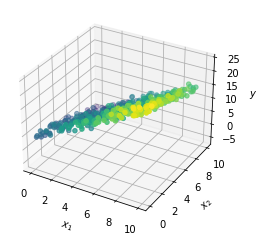

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y,c=y)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')

In [10]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X,y)
lm.intercept_
lm.coef_[0]
lm.coef_[1]

-1.020264486993336

Qué pasaría cuando le damos dos valores a x1 y x2?

In [11]:
X_0 = np.array([2,4])
lm.predict(X_0.reshape(1,-1))
lm.score(X,y)

0.9798997316600129

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)

lm.score(X_test, y_test)

0.9794930834681773

## Logistic Regression
Let's generate some classification data first.

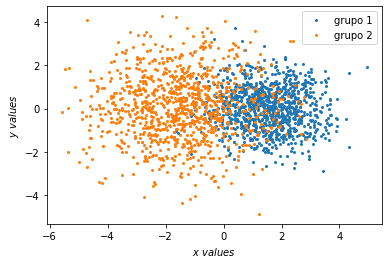

In [13]:
def gen_data(n, h, sd1, sd2):
    x1 = ss.norm.rvs(h,sd1,n)
    y1 = ss.norm.rvs(0,sd1,n)
    x2 = ss.norm.rvs(-h,sd2,n)
    y2 = ss.norm.rvs(0,sd2,n)
    return (x1, y1, x2, y2)

def plot_data(x1, y1, x2, y2):
    plt.figure()
    plt.plot(x1, y1, 'o', ms=2, label='grupo 1')
    plt.plot(x2, y2, 'o', ms=2, label='grupo 2')
    plt.legend()
    plt.xlabel('$x\ values$')
    plt.ylabel('$y\ values$')


(x1, y1, x2, y2) = gen_data(1000,1.5,1,1.5)

plot_data(x1, y1, x2, y2)


In [14]:
# # edx question: 

# def gen_data(n, h, sd1, sd2):
#    x1 = ss.norm.rvs(h, sd1, n)
#    y1 = ss.norm.rvs(0, sd1, n)
#    x2 = ss.norm.rvs(-h, sd2, n)
#    y2 = ss.norm.rvs(0, sd2, n)
#    return (x1, y1, x2, y2)

# def plot_data(x1, y1, x2, y2):
#    plt.figure()
#    plt.plot(x1, y1, "o", ms=2)
#    plt.plot(x2, y2, "o", ms=2)
#    plt.xlabel("$X_1$")
#    plt.ylabel("$X_2$") 

In [15]:
# (x1,y1,x2,y2) = gen_data(1000,0,1,1)
# plot_data(x1,y1,x2,y2)

In [16]:
def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p)

prob_to_odds(0.8)

4.000000000000001

Creación del modelo de regresión logística

In [17]:
clf = LogisticRegression()

X = np.vstack((np.vstack((x1,y1)).T, np.vstack((x2,y2)).T))

X.shape

(2000, 2)

Now adding two type of etiquettes(or labels).
In this case, labels are just `1` or `2`, so an array of 1000 `1s` and 1000 `2s` (2000 values in total) will be created using ``np.hstack()``

In [18]:
# since the last value assigned to n was 50
# let's reassign it
n = 1000
y = np.hstack((np.repeat(1,n),np.repeat(2,n)))
y.shape

(2000,)

For information about the meaning of shapes (2000, 2), or (2000,) or whatever it be, see [this StackOverflow response.](https://stackoverflow.com/questions/22053050/difference-between-numpy-array-shape-r-1-and-r)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.5, random_state=1)
# # let's examine all the shapes
# X_train.shape
# X_test.shape
# y_test.shape
y_train.shape

clf.fit(X_train, y_train)

LogisticRegression()

In [20]:
clf.score(X_test,y_test)

0.877

In [21]:
clf.predict_proba(np.array([-2,0]).reshape(1,-1))

array([[0.01569053, 0.98430947]])

In [22]:
clf.predict(np.array([-2,0]).reshape(1,-1))

array([2])

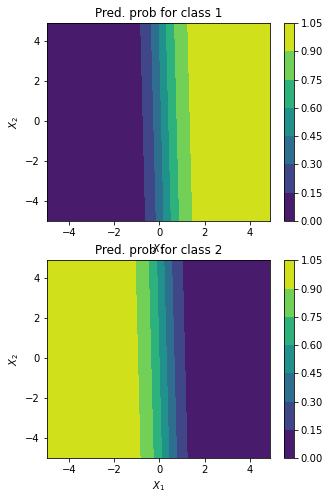

In [23]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");

In [24]:
# xx1, xx2 = np.meshgrid(np.arange(-2, 2, 1), np.arange(-2, 2, 1))

# # tengo problemas para entender np.stack()... so:
# # a = np.array([1, 2, 3])

# # b = np.array([4, 5, 6])

# # np.stack((a, b))
# # # array([[1, 2, 3],
# # #        [4, 5, 6]])
# # np.stack((a,b),axis=0)
# arrays = [np.random.randn(1, 2) for _ in range(2)]
# print(arrays)
# a = np.stack(arrays, axis=1)
# a

In [25]:
# #for i in range(1):
# a = np.random.randn(2,1,3,2)
# print(a)
# a.T